In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#loading data
data = pd.read_csv('pima-data.csv')

In [3]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
#checking for missing values
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

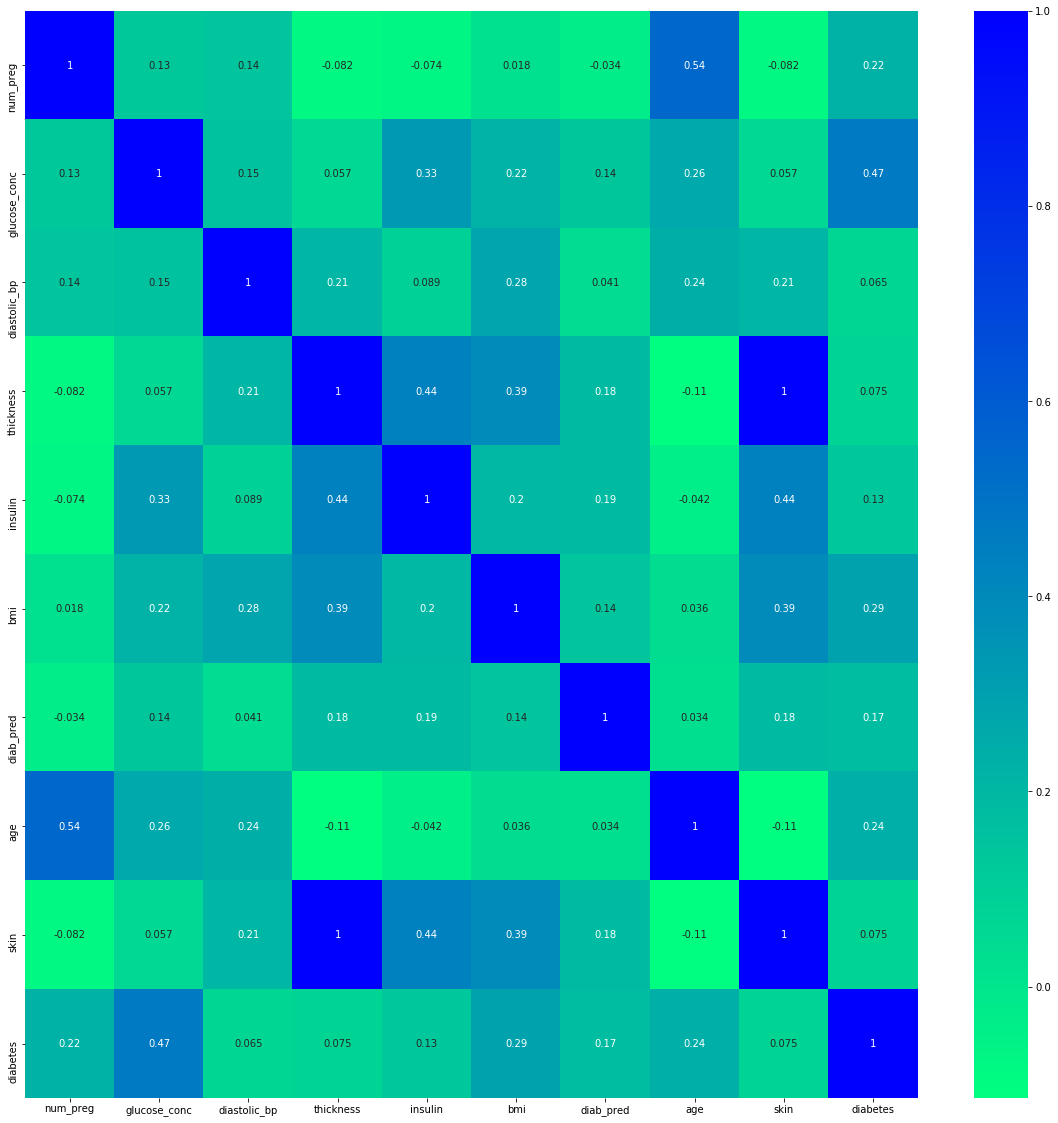

In [5]:
#finding the correlating between the features
corr_df = data.corr()
top_corr_features = corr_df.index
plt.figure(figsize=(20,20))

m = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='winter_r')

In [6]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [7]:
#convertng the output to binary 1 & 0
diabetes_map = {True: 1, False: 0}

In [8]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [10]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_fase_count = len(data.loc[data['diabetes'] == False])

In [11]:
diabetes_fase_count

500

In [12]:
diabetes_true_count

268

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
x = data.drop(['diabetes'], axis=1)

In [18]:
x

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,33.6,0.627,50,1.3790
1,1,85,66,29,0,26.6,0.351,31,1.1426
2,8,183,64,0,0,23.3,0.672,32,0.0000
3,1,89,66,23,94,28.1,0.167,21,0.9062
4,0,137,40,35,168,43.1,2.288,33,1.3790
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912
764,2,122,70,27,0,36.8,0.340,27,1.0638
765,5,121,72,23,112,26.2,0.245,30,0.9062
766,1,126,60,0,0,30.1,0.349,47,0.0000


In [19]:
y = data['diabetes'].values

In [20]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [28]:
#splitting the train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = 10)

In [29]:
#checking for 0 values in features 
print('number of rows missing glucose_conc: {}'.format(len(data.loc[data['glucose_conc'] == 0])))
print('number of rows missing num_preg: {}'.format(len(data.loc[data['num_preg'] == 0])))
print('number of rows missing diastolic_bp: {}'.format(len(data.loc[data['diastolic_bp'] == 0])))
print('number of rows missing thickness: {}'.format(len(data.loc[data['thickness'] == 0])))
print('number of rows missing age: {}'.format(len(data.loc[data['age'] == 0])))
print('number of rows missing bmi: {}'.format(len(data.loc[data['bmi'] == 0])))
print('number of rows missing insulin: {}'.format(len(data.loc[data['insulin'] == 0])))
print('number of rows missing diastolic_bp: {}'.format(len(data.loc[data['diastolic_bp'] == 0])))
print('number of rows missing skin: {}'.format(len(data.loc[data['skin'] == 0])))

number of rows missing glucose_conc: 5
number of rows missing num_preg: 111
number of rows missing diastolic_bp: 35
number of rows missing thickness: 227
number of rows missing age: 0
number of rows missing bmi: 11
number of rows missing insulin: 374
number of rows missing diastolic_bp: 35
number of rows missing skin: 227


In [27]:
from sklearn.impute import SimpleImputer


In [31]:
#filling the 0 values with the mean for each feature
fill_values = SimpleImputer(missing_values=0, strategy='mean')

x_train = fill_values.fit_transform(x_train)
x_test = fill_values.fit_transform(x_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
# using the random forest classifier model 
rand_clf = RandomForestClassifier(random_state=0)

rand_clf.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
pred = rand_clf.predict(x_test)

In [37]:
#checking the accuracy
from sklearn.metrics import accuracy_score

In [38]:
score = accuracy_score(y_test, pred)

In [39]:
score

0.75